In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("cars.csv")
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [3]:
df["normalized-losses"].value_counts()
#41 missing values as? which are there in normalizes_losses


normalized-losses
?      41
161    11
91      8
150     7
128     6
104     6
134     6
74      5
103     5
168     5
95      5
102     5
94      5
65      5
85      5
93      4
106     4
118     4
122     4
148     4
154     3
83      3
125     3
115     3
137     3
101     3
194     2
197     2
188     2
164     2
158     2
192     2
110     2
145     2
113     2
81      2
89      2
87      2
108     2
119     2
153     2
129     2
98      1
121     1
107     1
78      1
231     1
142     1
77      1
186     1
90      1
256     1
Name: count, dtype: int64

In [4]:
df["horsepower"].value_counts()

                    

horsepower
68     19
70     11
69     10
116     9
110     8
95      7
88      6
114     6
62      6
101     6
160     6
102     5
76      5
97      5
82      5
145     5
84      5
123     4
86      4
92      4
111     4
121     3
90      3
182     3
85      3
73      3
152     3
207     3
112     2
56      2
156     2
161     2
52      2
162     2
?       2
155     2
100     2
94      2
184     2
176     2
115     1
154     1
140     1
48      1
120     1
64      1
135     1
262     1
78      1
60      1
58      1
55      1
288     1
143     1
142     1
200     1
175     1
72      1
134     1
106     1
Name: count, dtype: int64

In [5]:
df["normalized-losses"]=df["normalized-losses"].replace("?",np.nan)
df["horsepower"]=df["horsepower"].replace("?",np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         203 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.2+ KB


In [6]:
df["normalized-losses"]=df["normalized-losses"].astype("float")

df["horsepower"]=df["horsepower"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         203 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.2+ KB


In [7]:
(df.isnull().sum()/len(df))*100  

symboling             0.00000
normalized-losses    20.00000
make                  0.00000
fuel-type             0.00000
body-style            0.00000
drive-wheels          0.00000
engine-location       0.00000
width                 0.00000
height                0.00000
engine-type           0.00000
engine-size           0.00000
horsepower            0.97561
city-mpg              0.00000
highway-mpg           0.00000
price                 0.00000
dtype: float64

In [8]:
df[["horsepower","normalized-losses"]].describe()

,horsepower,normalized-losses
count,203.000000,164.000000
mean,104.256158,122.000000
std,39.714369,35.442168
min,48.000000,65.000000
25%,70.000000,94.000000
50%,95.000000,115.000000
75%,116.000000,150.000000
max,288.000000,256.000000


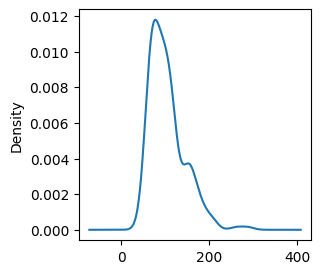

In [9]:
plt.figure(figsize=(3,3))
df["horsepower"].plot(kind='kde')
plt.show()

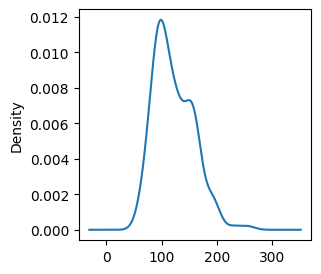

In [10]:
plt.figure(figsize=(3,3))
df["normalized-losses"].plot(kind="kde")
plt.show()

In [11]:
df["normalized-losses"]=df["normalized-losses"].fillna(df["normalized-losses"].median())

df["horsepower"]=df["horsepower"].fillna(df["horsepower"].median())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.2+ KB


In [12]:
df["normalized-losses"].median()


np.float64(115.0)

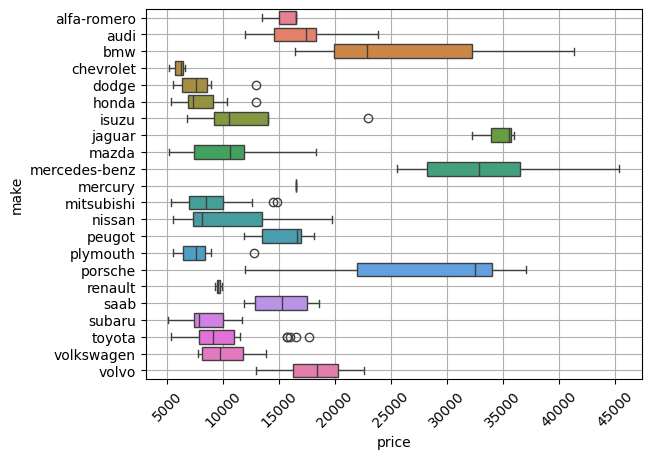

In [13]:
sns.boxplot(data=df,x="price",y="make",hue="make")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [14]:
'\ndodge -->10000\nhonda --- >13000\nisuzu -- > 20000\nmitsubhushi -- >13000\nplymouth -- >10000\ntoyota -->15000'


'\ndodge -->10000\nhonda --- >13000\nisuzu -- > 20000\nmitsubhushi -- >13000\nplymouth -- >10000\ntoyota -->15000'

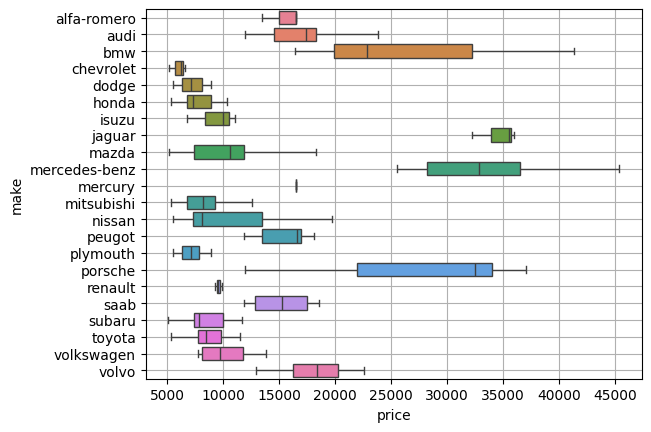

In [15]:
i=df[(df["make"]=="dodge")&(df["price"]>10000)].index
df.drop(i,axis=0,inplace=True)

i=df[(df["make"]=="honda")&(df["price"]>12500)].index
df.drop(i,axis=0,inplace=True)

i=df[(df["make"]=="isuzu")&(df["price"]>20000)].index
df.drop(i,axis=0,inplace=True)

i=df[(df["make"]=="mitsubishi")&(df["price"]>13000)].index
df.drop(i,axis=0,inplace=True)

i=df[(df["make"]=="plymouth")&(df["price"]>10000)].index
df.drop(i,axis=0,inplace=True)

i=df[(df["make"]=="toyota")&(df["price"]>15000)].index
df.drop(i,axis=0,inplace=True)

sns.boxplot(data=df,y="make",x="price",hue="make")
plt.grid()
plt.show()

In [16]:
from scipy.stats import skew

In [17]:
c=df.select_dtypes(["float64","int64"]).columns
c

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [18]:
for i in c:
    print(i," : ",skew(df[i]))

symboling  :  0.21386866184357742
normalized-losses  :  0.9632059441735282
width  :  0.9140400320504322
height  :  0.013839962443639326
engine-size  :  2.0541257626466156
horsepower  :  1.5620892525023995
city-mpg  :  0.5999073033714895
highway-mpg  :  0.4760310091695327
price  :  1.8166794702973463


symboling  :  0.21386866184357742


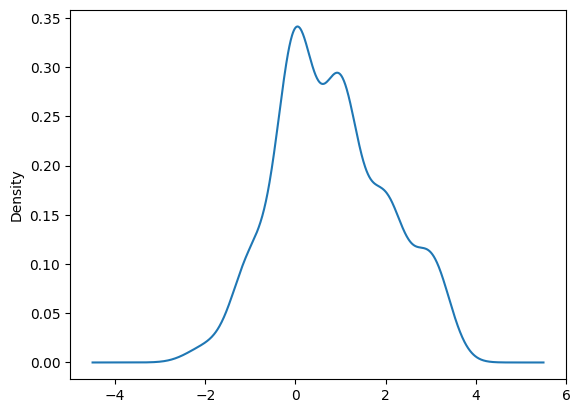

normalized-losses  :  0.9632059441735282


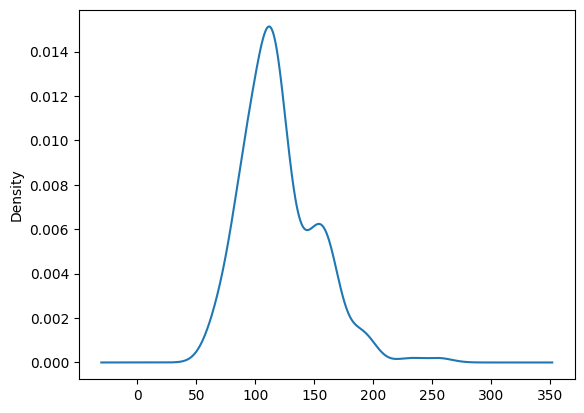

width  :  0.9140400320504322


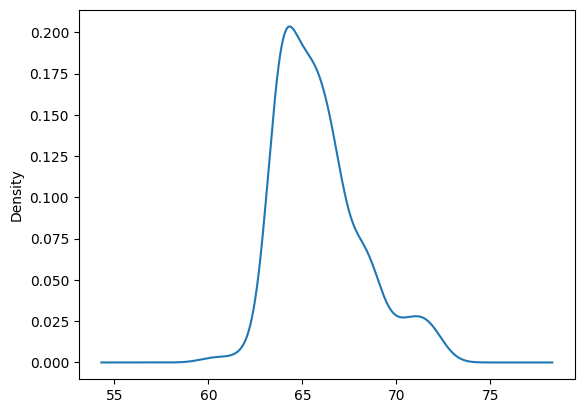

height  :  0.013839962443639326


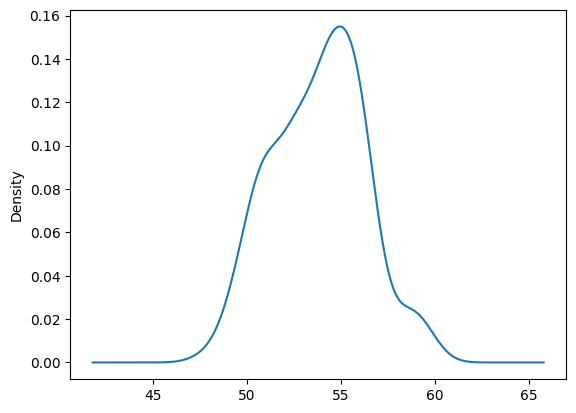

engine-size  :  2.0541257626466156


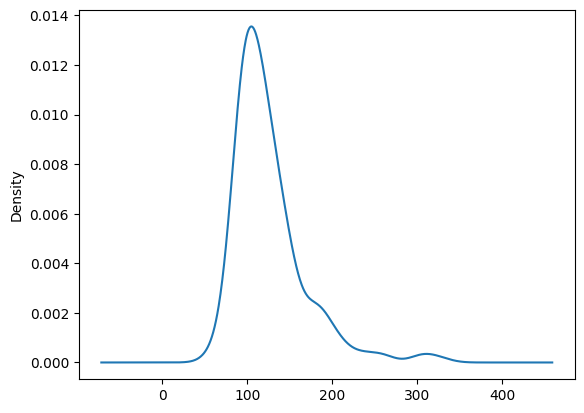

horsepower  :  1.5620892525023995


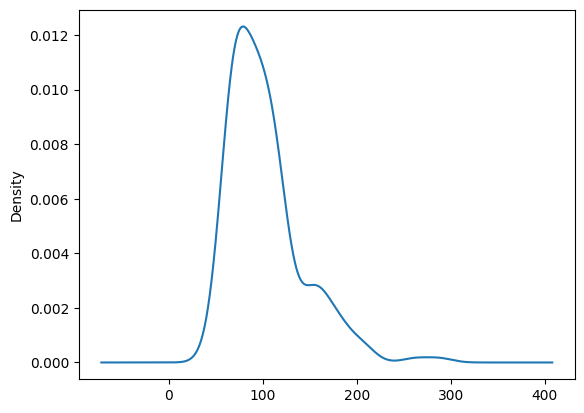

city-mpg  :  0.5999073033714895


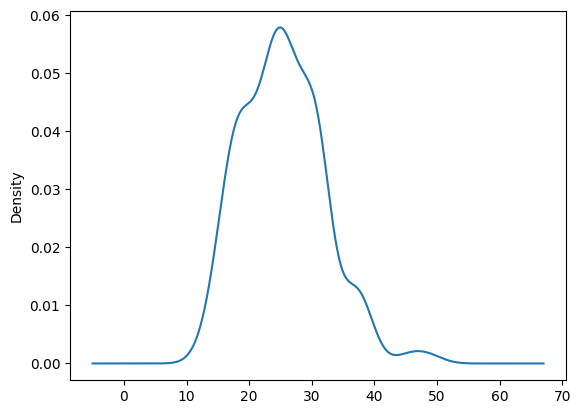

highway-mpg  :  0.4760310091695327


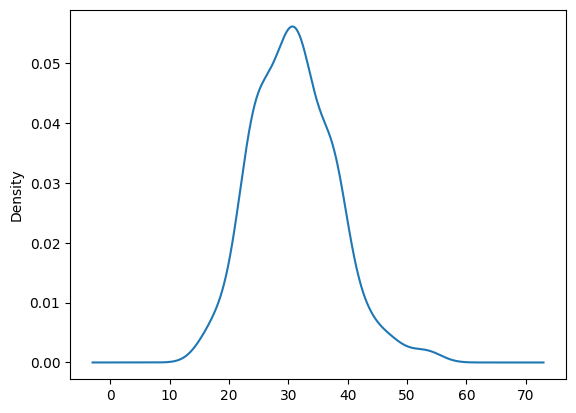

price  :  1.8166794702973463


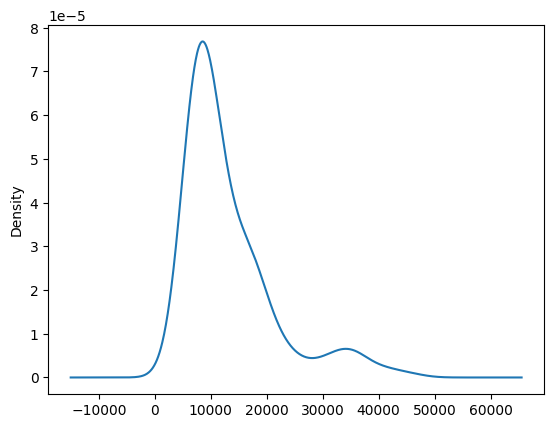

In [19]:
for i in c:
    print(i," : ",skew(df[i]))
    df[i].plot(kind="kde")
    plt.show()

In [20]:
np.log(25)

np.float64(3.2188758248682006)

##### 

In [21]:
np.log(-25)

np.float64(nan)

In [22]:
df[c].corr()["price"].sort_values()
"""
highly negativley correlated---
higway-mpg    -0.704846
city-mpg      -0.680412



highly + vely correlated--
width           0.730503
horsepower      0.769844
engine-size     0.869638
"""

'\nhighly negativley correlated---\nhigway-mpg    -0.704846\ncity-mpg      -0.680412\n\n\n\nhighly + vely correlated--\nwidth           0.730503\nhorsepower      0.769844\nengine-size     0.869638\n'

0.1482590319675759


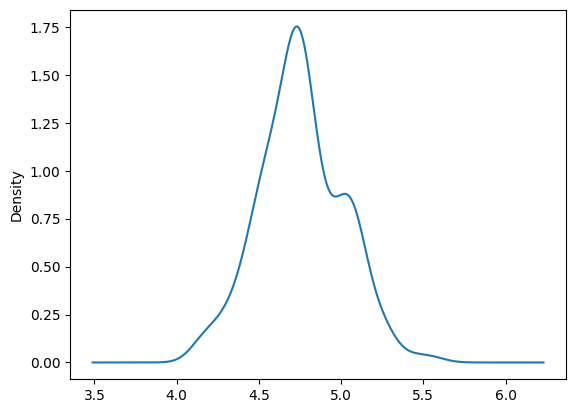

In [23]:
df["normalized-losses"]=np.log(df["normalized-losses"])
print(skew(df["normalized-losses"]))
df["normalized-losses"].plot(kind="kde")
plt.show()

In [24]:
z=df.select_dtypes("object").columns
z

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

In [25]:
df["fuel-type"]

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fuel-type, Length: 194, dtype: object

In [26]:
df["fuel-type"].value_counts()

fuel-type
gas       174
diesel     20
Name: count, dtype: int64

In [27]:
pd.get_dummies(df["fuel-type"]).astype("int")

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [28]:
pd.get_dummies(df["make"]).astype("int")

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
e=le.fit_transform(df["make"])
e

array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14,
       15, 15, 15, 15, 15, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21])

In [34]:
le.classes_

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [38]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[z]=oe.fit_transform(df[z])
df[z]

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0.0,1.0,0.0,2.0,0.0,0.0
1,0.0,1.0,0.0,2.0,0.0,0.0
2,0.0,1.0,2.0,2.0,0.0,5.0
3,1.0,1.0,3.0,1.0,0.0,3.0
4,1.0,1.0,3.0,0.0,0.0,3.0
...,...,...,...,...,...,...
200,21.0,1.0,3.0,2.0,0.0,3.0
201,21.0,1.0,3.0,2.0,0.0,3.0
202,21.0,1.0,3.0,2.0,0.0,5.0
203,21.0,0.0,3.0,2.0,0.0,3.0


##DATA SCALING

In [39]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
m=mn.fit_transform(df.iloc[:,:-1])
m

array([[1.        , 0.41621604, 0.        , ..., 0.2625    , 0.22222222,
        0.28947368],
       [1.        , 0.41621604, 0.        , ..., 0.2625    , 0.22222222,
        0.28947368],
       [0.6       , 0.41621604, 0.        , ..., 0.44166667, 0.16666667,
        0.26315789],
       ...,
       [0.2       , 0.27684005, 1.        , ..., 0.35833333, 0.13888889,
        0.18421053],
       [0.2       , 0.27684005, 1.        , ..., 0.24166667, 0.36111111,
        0.28947368],
       [0.2       , 0.27684005, 1.        , ..., 0.275     , 0.16666667,
        0.23684211]])

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df.iloc[:,:-1]=scaler.fit_transform(df.iloc[:,:-1])
df.iloc[:,:-1]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,1.846173,-0.044137,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-0.820757,-2.056808,-3.110852,0.104252,0.220974,-0.675762,-0.580474
1,1.846173,-0.044137,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-0.820757,-2.056808,-3.110852,0.104252,0.220974,-0.675762,-0.580474
2,0.176441,-0.044137,-1.934007,0.339032,-0.748984,1.234608,-0.125327,-0.179636,-0.582442,1.943631,0.628957,1.317561,-0.982065,-0.726156
3,1.011307,1.361717,-1.774620,0.339032,0.432341,-0.566249,-0.125327,0.140924,0.195695,-0.078162,-0.396602,-0.008544,-0.216307,-0.143429
4,1.011307,1.361717,-1.774620,0.339032,0.432341,-2.367105,-0.125327,0.232512,0.195695,-0.078162,0.247354,0.322982,-1.135217,-1.308883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.493292,-0.800884,1.413123,0.339032,0.432341,1.234608,-0.125327,1.377370,0.687151,-0.078162,0.366605,0.297480,-0.369459,-0.434792
201,-1.493292,-0.800884,1.413123,0.339032,0.432341,1.234608,-0.125327,1.331576,0.687151,-0.078162,0.366605,1.470573,-0.982065,-0.871838
202,-1.493292,-0.800884,1.413123,0.339032,0.432341,1.234608,-0.125327,1.377370,0.687151,1.943631,1.129812,0.807521,-1.135217,-1.163201
203,-1.493292,-0.800884,1.413123,-2.949576,0.432341,1.234608,-0.125327,1.377370,0.687151,-0.078162,0.462006,0.093464,0.089996,-0.580474


In [41]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,1.846173,-0.044137,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-0.820757,-2.056808,-3.110852,0.104252,0.220974,-0.675762,-0.580474,13495
1,1.846173,-0.044137,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-0.820757,-2.056808,-3.110852,0.104252,0.220974,-0.675762,-0.580474,16500


In [43]:
features=df.drop("price",axis=1)
target=df["price"]
print(features.shape)
print(target.shape)

(194, 14)
(194,)


In [44]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,random_state=10,test_size=0.2)

In [45]:
print(f"Training data : {xtrain.shape, ytrain.shape}")
print(f"Training data : {xtest.shape, ytest.shape}")


Training data : ((155, 14), (155,))
Training data : ((39, 14), (39,))


In [46]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [47]:
ypred=lr.predict(xtest)

In [50]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(ytest,ypred)
r2=r2_score(ytest,ypred)
print("Mean Square error i.e. error in predictionof each point : ",mse)
print("R2 Score : ",r2)

Mean Square error i.e. error in predictionof each point :  10859990.330204155
R2 Score :  0.837549077108567


In [51]:
lr.score(xtrain,ytrain)


0.8647684592758365

In [52]:
lr.score(xtest,ytest)

0.837549077108567

In [54]:
l1=Lasso(201)
l1.fit(xtrain,ytrain)
score_test=l1.score(xtest,ytest)
score_train=l1.score(xtrain,ytrain)
print(f"train :{score_train} test : {score_test}")

train :0.8537002958725426 test : 0.8843496574343059


In [55]:
dict={"Input":xtrain.columns,"Slope after applying Lasso" : l1.coef_}
d=pd.DataFrame(dict)
d

,Input,Slope after applying Lasso
0,symboling,2.099114
1,normalized-losses,-0.000000
2,make,-994.942699
3,fuel-type,-231.946779
4,body-style,-0.000000
5,drive-wheels,877.707688
6,engine-location,1557.350253
7,width,1282.088429
8,height,518.965518
9,engine-type,151.168949


In [57]:
from sklearn.linear_model import Ridge 


In [58]:
for i in range(0,51):
    l2=Ridge(i)
    l2.fit(xtrain,ytrain)
    score_test=l2.score(xtest,ytest)
    score_train=l2.score(xtrain,ytrain)
    print(f"i : {i} train :{score_train} test : {score_test}")

i : 0 train :0.8647684592758365 test : 0.8375490771085685
i : 1 train :0.8644827874201734 test : 0.8455923071947259
i : 2 train :0.8639474447452721 test : 0.8513428628183368
i : 3 train :0.8633430181617352 test : 0.8558425574647406
i : 4 train :0.8627165607527548 test : 0.8595401091348885
i : 5 train :0.862082262561294 test : 0.8626679871281197
i : 6 train :0.8614449350564674 test : 0.865363157674946
i : 7 train :0.8608064631155163 test : 0.8677141914172918
i : 8 train :0.8601677612752174 test : 0.8697824534995386
i : 9 train :0.8595293999038336 test : 0.8716127322086534
i : 10 train :0.8588918095190914 test : 0.8732390508291483
i : 11 train :0.8582553468943863 test : 0.8746880759852326
i : 12 train :0.8576203161902719 test : 0.8759812348864997
i : 13 train :0.856986976345329 test : 0.8771360950019265
i : 14 train :0.8563555449662164 test : 0.8781672998743945
i : 15 train :0.8557262017729117 test : 0.87908722571024
i : 16 train :0.8550990922672002 test : 0.8799064554942149
i : 17 train

In [29]:
'''
training score>testing score -- case of overfitting
testing score>training score -- case of underfittingl1
underfitting--increase number of features, do feature engineering, connect with client for more data.
overfitting -- regularization -- to add external error during training time.
2 types of regularization--
L1 (lasso regularization ):= residual error(RSS)+lambda*(sum(abs(all slopes)))
lambda --200-1000
L2(Ridge Regularization):= Residual error(RSS)+lambda*(sum(all slopes)**2))
lambda --1-50
'''


'\ntraining score>testing score -- case of overfitting\ntesting score>training score -- case of underfitting\nunderfitting--increase number of features, do feature engineering, connect with client for more data.\noverfitting -- regularization -- to add external error during training time.\n2 types of regularization--\nL1 (lasso regularization ):= residual error(RSS)+lambda*(sum(abs(all slopes)))\nlambda --200-1000\nL2(Ridge Regularization):= Residual error(RSS)+lambda*(sum(all slopes)**2))\nlambda --1-50\n'

In [59]:
l2=Ridge(13)
l2.fit(xtrain,ytrain)
score_test=l2.score(xtest,ytest)
score_train=l2.score(xtrain,ytrain)
print(f"train :{score_train} test : {score_test}")

train :0.856986976345329 test : 0.8771360950019265


In [60]:
dict={"Input":xtrain.columns,"Slope after Ridge" : l2.coef_,"Slope after Lasso" : l1.coef_,
      "slope after Linear Regression" : lr.coef_}
d=pd.DataFrame(dict)
d

,Input,Slope after Ridge,Slope after Lasso,slope after Linear Regression
0,symboling,287.545203,2.099114,651.639597
1,normalized-losses,-173.783046,-0.000000,-226.812038
2,make,-1248.245046,-994.942699,-1329.740864
3,fuel-type,-486.362629,-231.946779,-240.329948
4,body-style,-121.387037,-0.000000,97.071956
5,drive-wheels,1099.564028,877.707688,1160.831588
6,engine-location,1597.532876,1557.350253,2069.968299
7,width,1361.218141,1282.088429,1457.369997
8,height,878.319343,518.965518,889.643339
9,engine-type,408.945719,151.168949,381.356009


'''
cross validation : is another method to deal with a overfitting is is a technique to asses the performance of a ml model 
by splitting the dataset in to multiple folds training the model on some folds and testing it on the remaining folds these insures
robuts invalution by the model also it the testing score by both ridge and lasso are same then used cross validation to decide which one of them 
is the best.
'''


In [61]:
from sklearn.model_selection import cross_val_score
l1=Lasso(201)
scores = cross_val_score(l1, features,target, cv=5)
scores

array([0.73761929, 0.85210614, 0.28729465, 0.43518391, 0.53806298])

In [62]:
np.mean(scores).round(2)

np.float64(0.57)

In [64]:
from sklearn.model_selection import cross_val_score
l2=Ridge(2)
scores = cross_val_score(l2, features, target, cv=5)
scores

array([0.75615638, 0.86658736, 0.07701002, 0.46061358, 0.50570079])

In [65]:
np.mean(scores).round(2)

np.float64(0.53)

because the mean of lasso regularization is better the ridge regularization for these dataset the lasso is 